<h1> The Challenge:</h1>

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# feel free to import other libraries! 

In [2]:
df = pd.read_csv('../data/states_edu.csv')

Chosen test: **Math for 8 grade**

<h2> Cleanup (optional)</h2>

_Use this space to rename columns, deal with missing data, etc._

In [5]:
# renaming
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

df.shape # 1715 rows

# how much useable data for AVG_MATH_8_SCORE?
df.notna().sum() # 602 rows useable

# how many rows can we work with if we drop missing data?
df.dropna() # 355 rows, more than half of AVG_MATH_8_SCORE, should be okay but let's try to add more data

# is there a difference between ENROLL and GRADES_ALL_G
((df['ENROLL_ALL_EST'] - df['ENROLL_ALL'])/df['ENROLL_ALL_EST']).describe() # ~3% difference, safe to merge

df.count() # ENROLL has less data than GRADES_ALL_G, use to fill 
df['ENROLL_ALL_EST'] = df['ENROLL_ALL_EST'].fillna(df['ENROLL_ALL'])

df = df.dropna()
df


,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
561,2003_ALABAMA,ALABAMA,2003,727900.0,5196054.0,567704.0,2966981.0,1661369.0,5298932.0,2817111.0,...,57323.0,59663.0,42005.0,466920.0,205907.0,731220.0,223.0,262.0,207.0,253.0
562,2003_ALASKA,ALASKA,2003,133303.0,1425948.0,259423.0,813371.0,353154.0,1610289.0,763525.0,...,10115.0,11140.0,8651.0,82337.0,40238.0,133933.0,233.0,279.0,212.0,256.0
563,2003_ARIZONA,ARIZONA,2003,875111.0,6529894.0,740579.0,2912629.0,2876686.0,6210287.0,2810907.0,...,76207.0,76376.0,68815.0,613442.0,307272.0,1012068.0,229.0,271.0,209.0,255.0
564,2003_ARKANSAS,ARKANSAS,2003,450158.0,3241275.0,379947.0,2394336.0,466992.0,3242799.0,1768713.0,...,34070.0,37004.0,28840.0,281834.0,132712.0,454523.0,229.0,266.0,214.0,258.0
565,2003_CALIFORNIA,CALIFORNIA,2003,6226552.0,59815855.0,5795655.0,33617766.0,20402434.0,59749885.0,29561563.0,...,493415.0,500143.0,395194.0,3929869.0,1854518.0,6413867.0,227.0,267.0,206.0,251.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,2015_VIRGINIA,VIRGINIA,2015,1279867.0,15857524.0,1012205.0,6240349.0,8604970.0,16113212.0,8755896.0,...,96851.0,95221.0,90391.0,772414.0,386781.0,1283590.0,247.0,288.0,229.0,267.0
1220,2015_WASHINGTON,WASHINGTON,2015,1072359.0,13709442.0,1036422.0,8293812.0,4379208.0,13630138.0,6508964.0,...,82404.0,79483.0,89258.0,656797.0,336808.0,1087030.0,245.0,287.0,226.0,267.0
1221,2015_WEST_VIRGINIA,WEST_VIRGINIA,2015,279565.0,3478401.0,362959.0,1979466.0,1135976.0,3466981.0,1819903.0,...,19814.0,20426.0,18432.0,162070.0,80142.0,277452.0,235.0,271.0,216.0,260.0
1222,2015_WISCONSIN,WISCONSIN,2015,861813.0,11637376.0,814385.0,5869265.0,4953726.0,11553677.0,5723474.0,...,60999.0,61084.0,66253.0,489919.0,263896.0,867800.0,243.0,289.0,223.0,270.0


<h2> Feature Selection </h2>

_Use this space to modify or create features_

In [33]:
# create new variable grade 8 proportion
df['PROP_8_GRADE'] = df['ENROLL_8'] / df['ENROLL_ALL']
df['PROP_8_GRADE']

# create new variable gov funding per student
# make magnitude comparable to other variables
df['GOV_FUNDING_PER_8_STUDENT_10^5'] = ((df['FEDERAL_REVENUE'] + df['STATE_REVENUE'] + df['LOCAL_REVENUE']) * df['PROP_8_GRADE']) / 10**5
df['GOV_FUNDING_PER_8_STUDENT_10^5']

# make magnitude comparable to other variables
df['AVG_READING_8_SCORE_10^2'] = df['AVG_READING_8_SCORE'] / 100
df['AVG_READING_8_SCORE_10^2']



561     2.53
562     2.56
563     2.55
564     2.58
565     2.51
        ... 
1219    2.67
1220    2.67
1221    2.60
1222    2.70
1223    2.69
Name: AVG_READING_8_SCORE_10^2, Length: 355, dtype: float64

Final feature list: **Government funding for 8th grade students and Average 8th grade reading score**

Feature selection justification: **I wanted to explore the relationship between government funding with proportion to the 8th grade population, because I expect there will be some effect of money on the quality of education, and thus average math scores of 8th graders. I chose average 8th grade reading score, because I also expect there to be some relationship between those who do well in reading as well as in math, though I know different students also have different strengths.**

<h2> EDA </h2>

Visualization 1

Text(0, 0.5, 'Average 8th Grade Math Score')

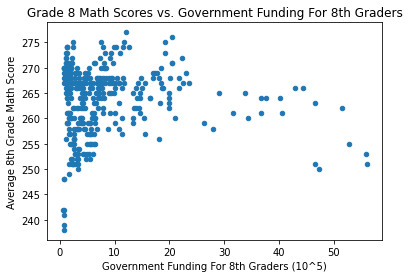

In [36]:
df.plot.scatter(x ='GOV_FUNDING_PER_8_STUDENT_10^5',y = 'AVG_READING_8_SCORE')
plt.title('Grade 8 Math Scores vs. Government Funding For 8th Graders')
plt.xlabel('Government Funding For 8th Graders (10^5)')
plt.ylabel('Average 8th Grade Math Score')

**Higher govenment funding does not necessarily equate higher 8th grade math scores.**

Visualization 2

Text(0, 0.5, 'Average 8th Grade Math Score')

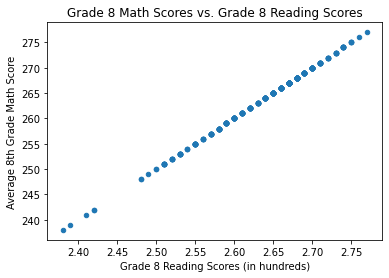

In [37]:
df.plot.scatter(x = 'AVG_READING_8_SCORE_10^2',y = 'AVG_READING_8_SCORE')
plt.title('Grade 8 Math Scores vs. Grade 8 Reading Scores')
plt.xlabel('Grade 8 Reading Scores (in hundreds)')
plt.ylabel('Average 8th Grade Math Score')

**Grade 8 reading scores almost perfectly predict grade 8 math scores.**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X = df[['GOV_FUNDING_PER_8_STUDENT_10^5','AVG_READING_8_SCORE_10^2']]
y = df.loc[X.index]['AVG_MATH_8_SCORE']

In [87]:
# tested with different test_sizes, .2 leads to most accurate model
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.2, random_state=0)

<h2> Prediction </h2>

Chosen ML task: **REGRESSION**

In [88]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [89]:
# create your model here
model = LinearRegression()

In [90]:
model.fit(X_train, y_train)

LinearRegression()

In [91]:
y_pred = model.predict(X_test)

In [92]:
# FOR CLASSIFICATION ONLY:
#from sklearn.metrics import plot_confusion_matrix

#plot_confusion_matrix(model, X_test, y_test,
#                         cmap=plt.cm.Blues)

R square value:  0.8213876015987387
Mean error:  -0.7393902018164364


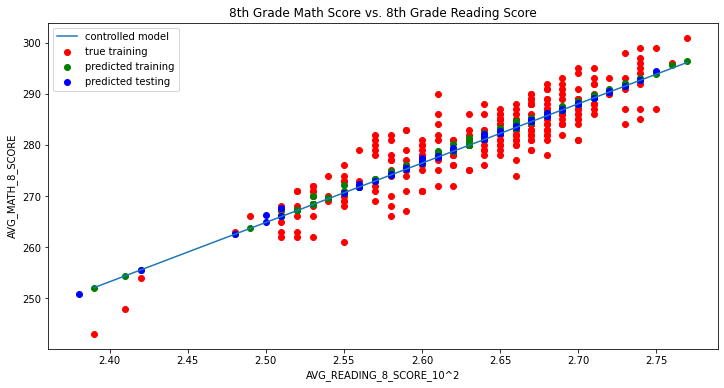

In [98]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'AVG_READING_8_SCORE_10^2'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.title('8th Grade Math Score vs. 8th Grade Reading Score')
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_8_SCORE')

# R square values close to 1 indicate high accuracy model
print('R square value: ', model.score(X_test, y_test))
# Mean error
print('Mean error: ', np.mean(model.predict(X_test)-y_test))


<h2> Summary </h2>

**Though about half the data for Average 8th Grade Math Scores were dropped, it is clear that there is a definite relationship between 8th Grade Reading Score and 8th Grade Math Score. Using quick visualization, I was able to find a clear positive, linear relationship between the two variables, and was quickly able to conclude that 8th Grade Reading Score could be used to predict 8th Grade Math Score with better accuracy than monetary influences, as shown by my nonlinear plot for Government Funding and 8th Grade Math Score. Analyzing the relationship between 8th Grade Reading and Math Score further, I utilized the machine learning process to train and test the machine to create a new model for the relationship. I found that using an 80/20 ratio of train/test data, the machine could predict the linear model most accurately. The R square value for this linear model was 0.8, where R square values close to 1 generally indicate a definite relationship. Thus, I have found that 8th Grade Reading Scores can be used to predict 8th Grade Math Scores.**